# part A 

In [1]:
##import main libraries 
import pandas as pd 
import researchpy as rp
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import numpy as np # linear algebra
import os # accessing directory structure


# Read Data 

In [3]:
df_ingredient = pd.read_csv('ingredient.csv')
df_ingredient.dataframeName = 'ingredient.csv'
nRow, nCol = df_ingredient.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 214 rows and 9 columns


In [4]:
df_ingredient.head(15)

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00
5,1.51721,12.87,3.48,1.33,73.04,0.56,8.43,0.00,0.00
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
7,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00
8,1.51747,12.84,3.50,1.14,73.27,0.56,8.55,0.00,0.00
9,1.52121,14.03,3.76,0.58,71.79,0.11,9.65,0.00,0.00


In [5]:
####Check number of columns and data type of them and check number of non value  
df_ingredient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
a    214 non-null float64
b    214 non-null float64
c    214 non-null float64
d    214 non-null float64
e    214 non-null float64
f    214 non-null float64
g    214 non-null float64
h    214 non-null float64
i    214 non-null float64
dtypes: float64(9)
memory usage: 15.2 KB


Result : 
So we don't have any none data 

In [6]:
##statistical summary of data 
df_ingredient.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


# Correlation Matrix 

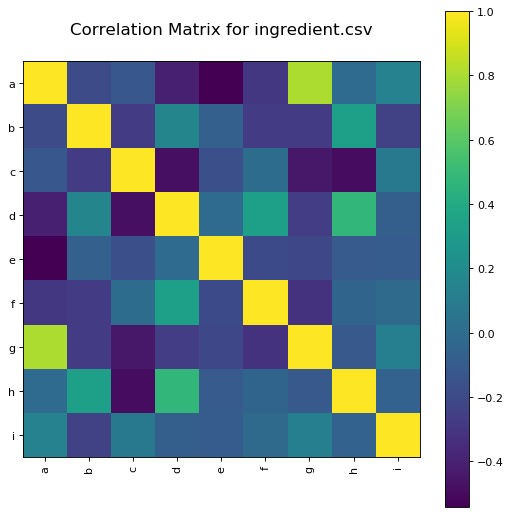

In [91]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
plotCorrelationMatrix(df_ingredient, 8)

Findings:



Attributes a and g have a very high correlation.


Attributes a and e have a low correlation.


Attributes c and d have a low correlation.

Attributes f and h and i have not normally distubution 


# Anova Test 

In [92]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(df_ingredient['a'], df_ingredient['b'], df_ingredient['c'],
                                df_ingredient['d'], df_ingredient['e'], df_ingredient['f'], 
                                df_ingredient['g'], df_ingredient['h'], df_ingredient['i'])

print("f-value is {} and p-value is {} ".format(fvalue, pvalue))

f-value is 168331.96885835085 and p-value is 0.0 


In [93]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols
# reshape the d dataframe suitable for statsmodels package 
d_melt = pd.melt(df_ingredient.reset_index(), id_vars=['index'], value_vars=['a', 'b', 'c', 'd','e','f','g','h','i'])
# replace column names
d_melt.columns = ['index', 'treatments', 'value']
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),943261.084445,8.0,168331.968858,0.0
Residual,1342.757047,1917.0,NaN,NaN


Here, there are four treatments (A, B, C, and D), which are groups for ANOVA analysis. Treatments are independent variable and termed as factor. As there are four types of treatments, treatment factor has four levels.

For this experimental design, there is only factor (treatments) or independent variable to evaluate, and therefore, one-way ANOVA method is suitable for analysis.

The p value obtained from ANOVA analysis is significant (p < 0.05), and therefore, we conclude that there are significant differences among treatments.

# Part B 

# Calculate Variance of Data Set 

In [94]:
##calculate variance of data
df_ingredient.var()

a    0.000009
b    0.666841
c    2.080540
d    0.249270
e    0.599921
f    0.425354
g    2.025366
h    0.247227
i    0.009494
dtype: float64

Result: 

Attributes a and i have low variance
c and g have not much variance 



# Scatter and density plots:

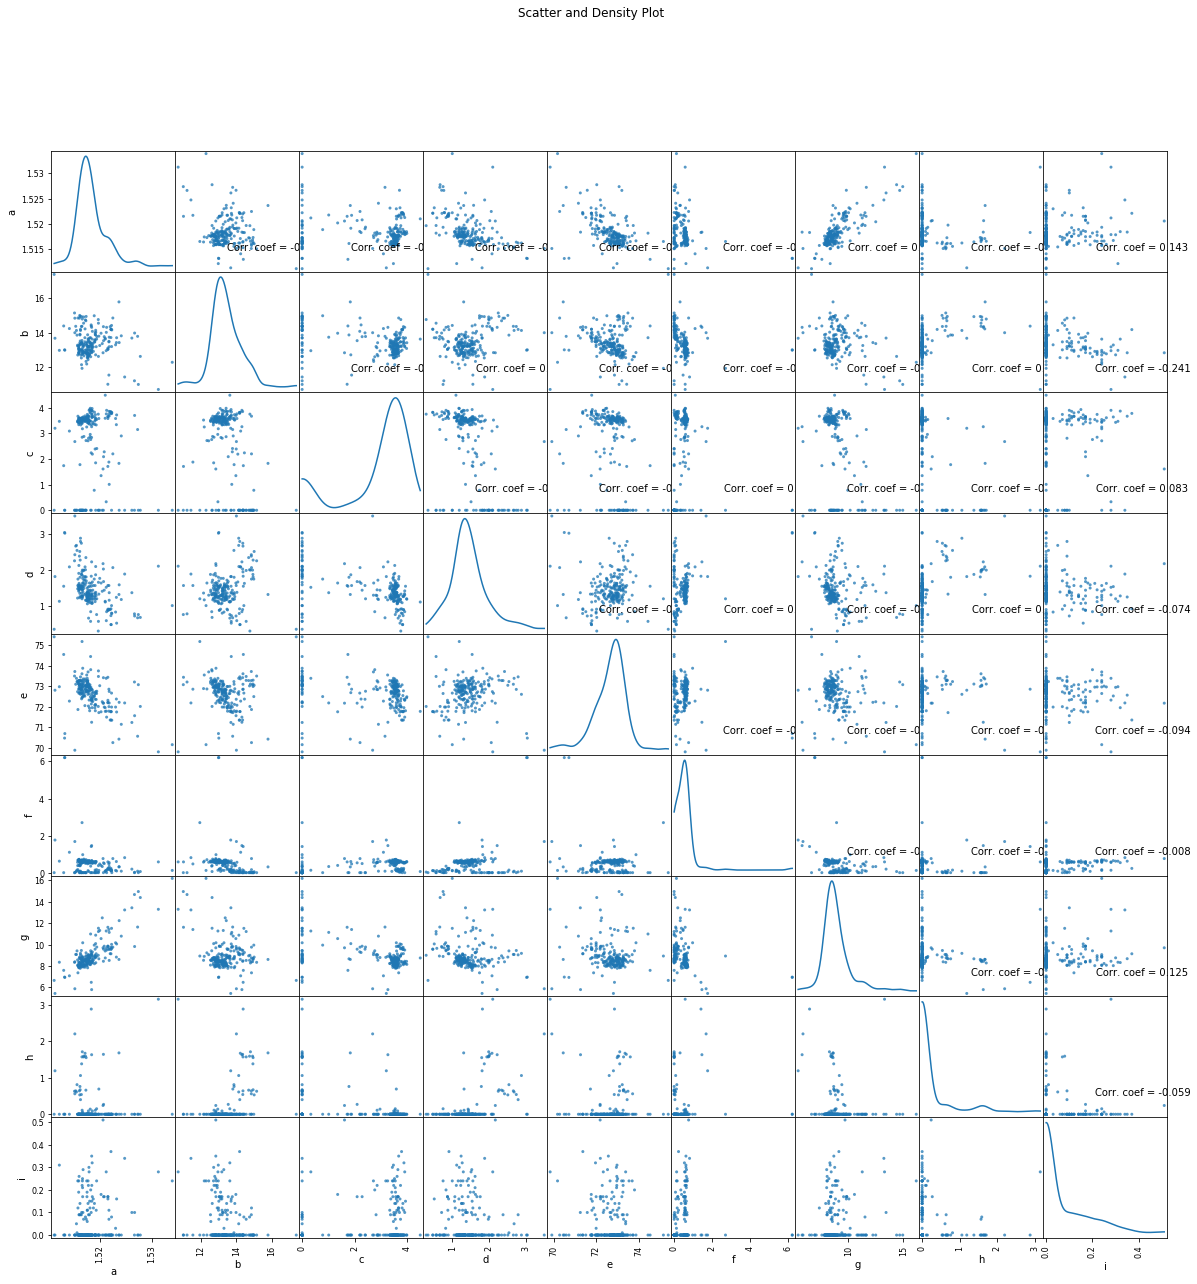

In [29]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

plotScatterMatrix(df_ingredient, 20, 10)

# Histogram 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE4653B448>,
      dtype=object)

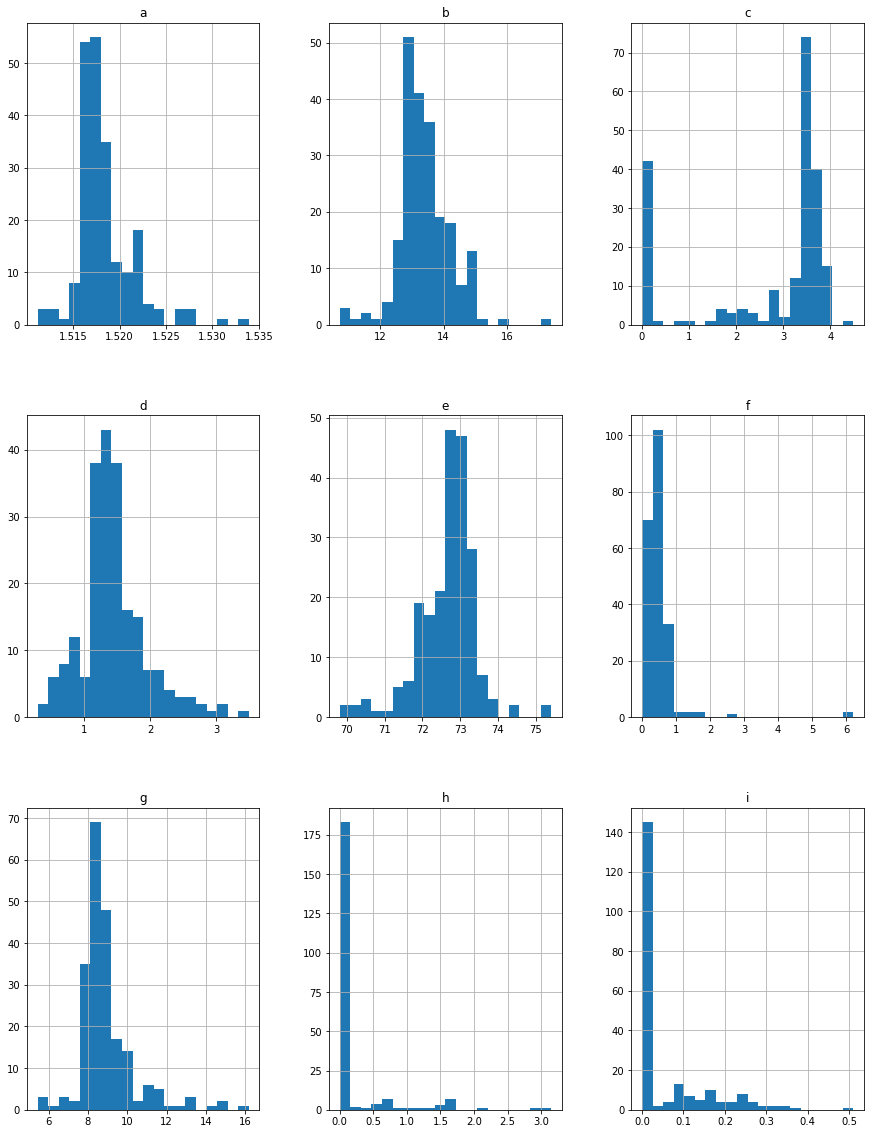

In [36]:
### histogaram bar for all attribute of data  
df_ingredient.hist(bins=20,figsize=(15,20))

# Trend of changes in each attribute

cannot find trend in h


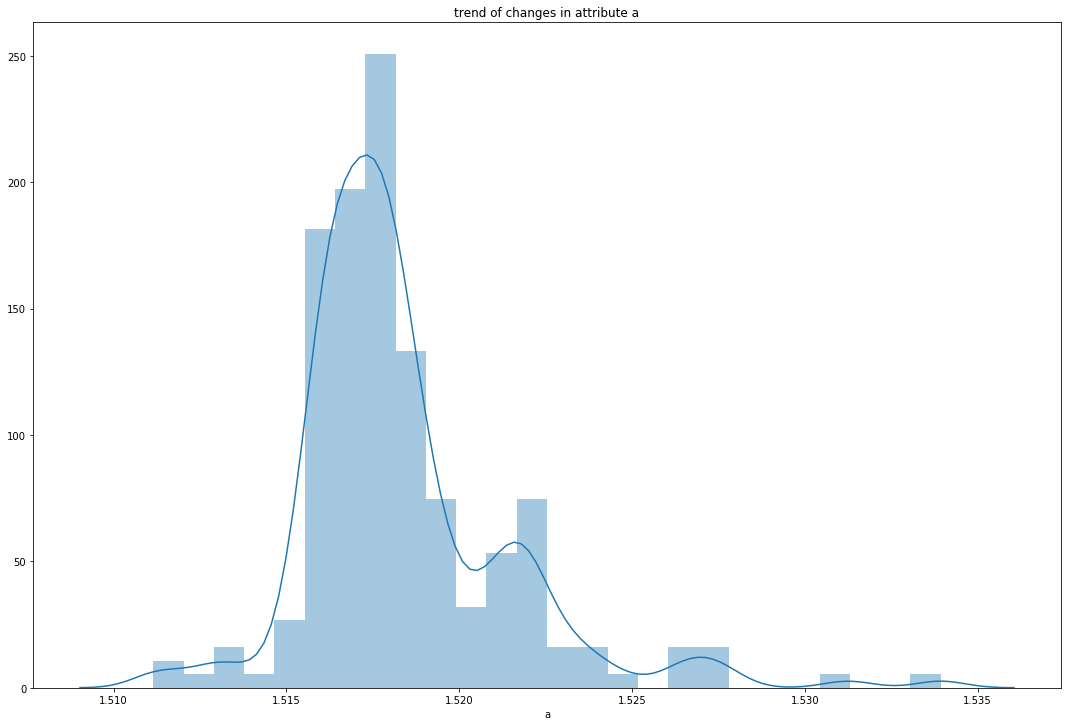

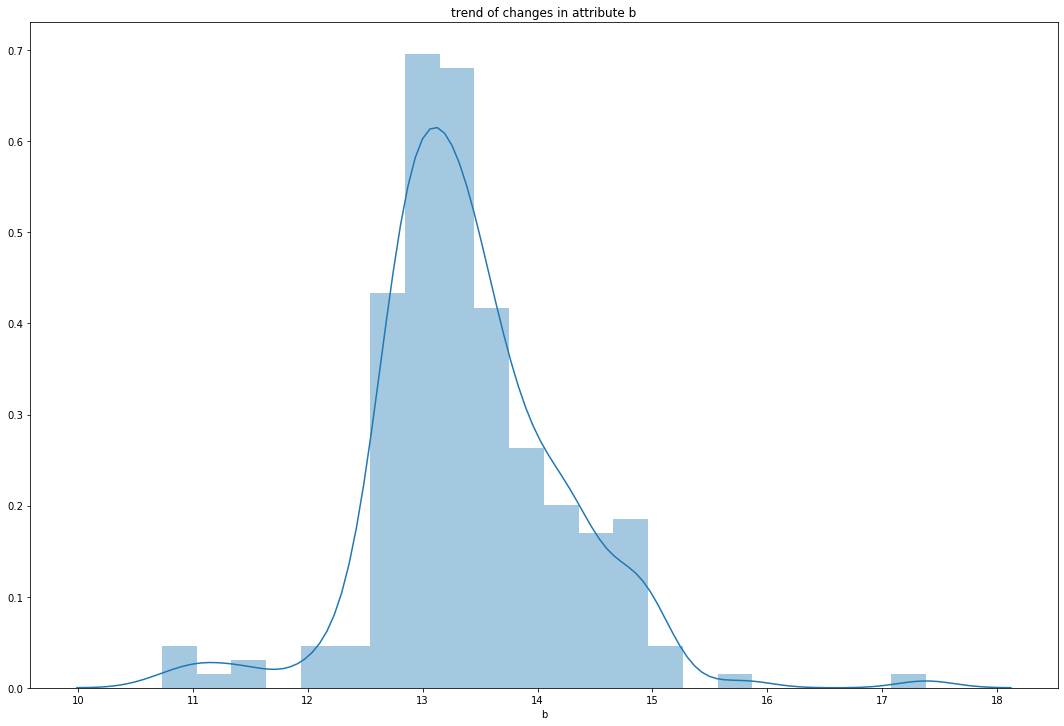

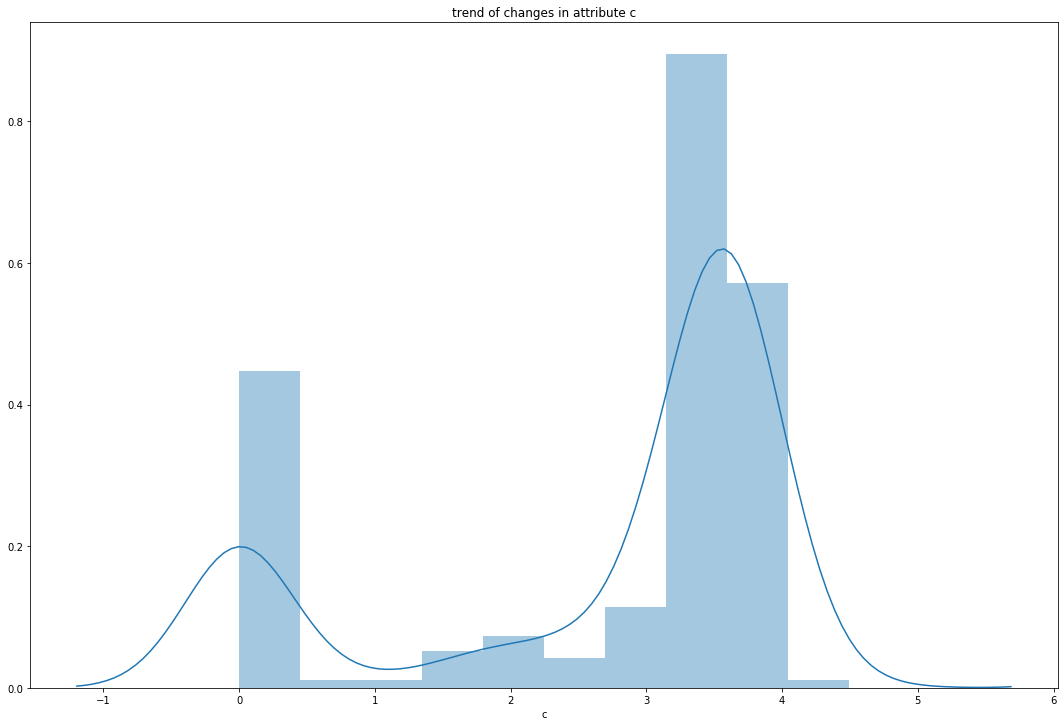

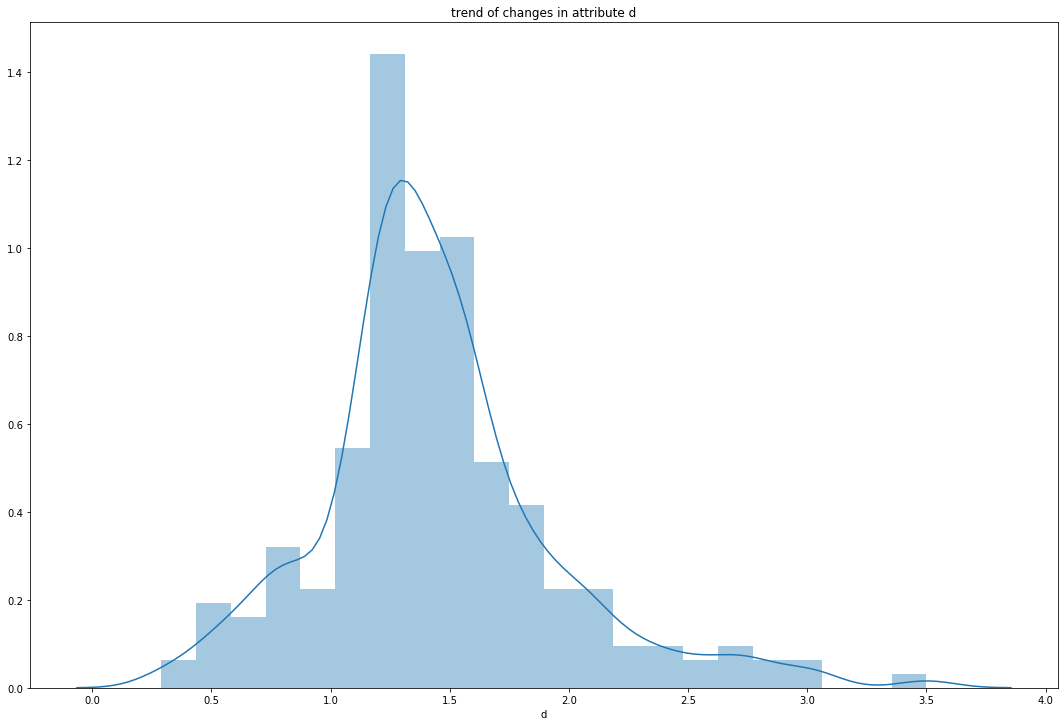

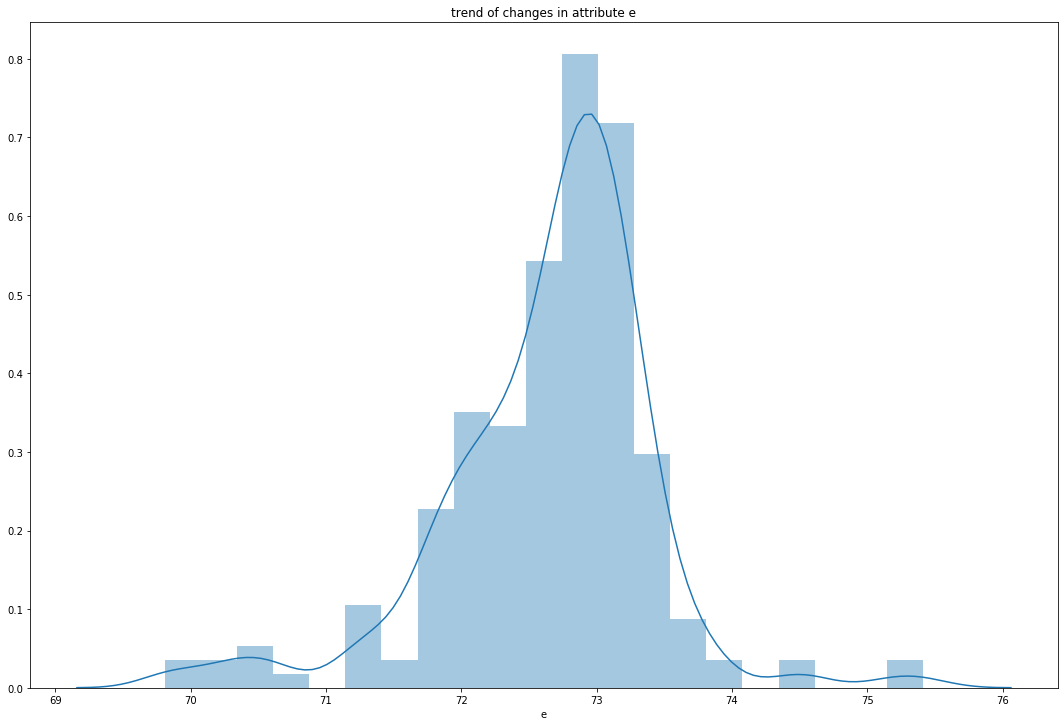

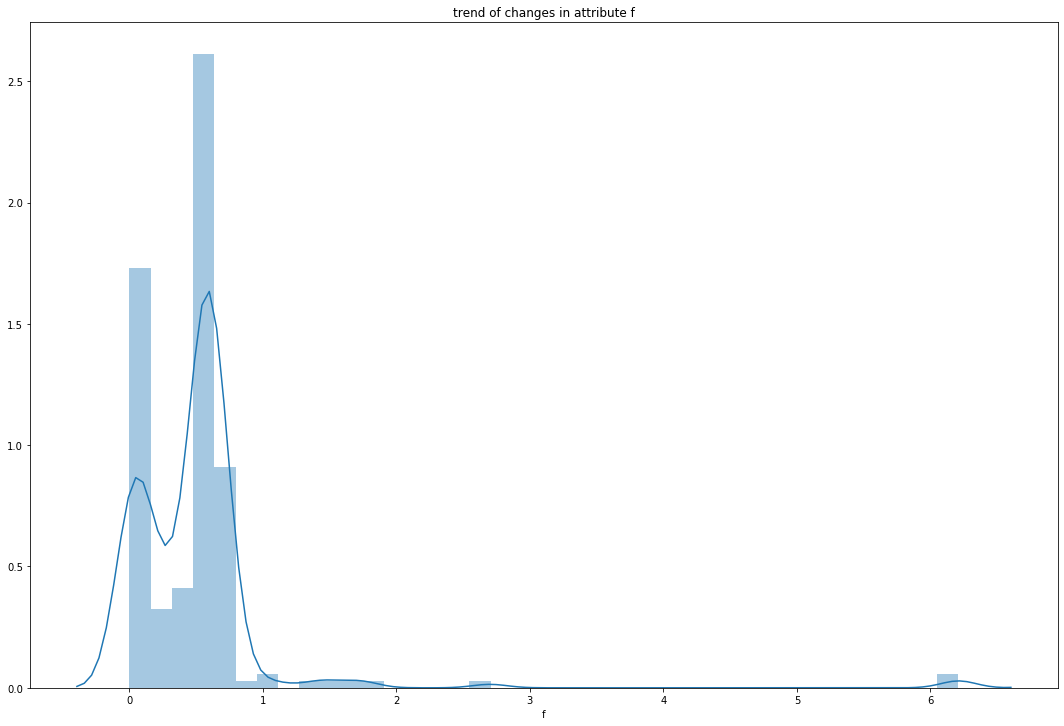

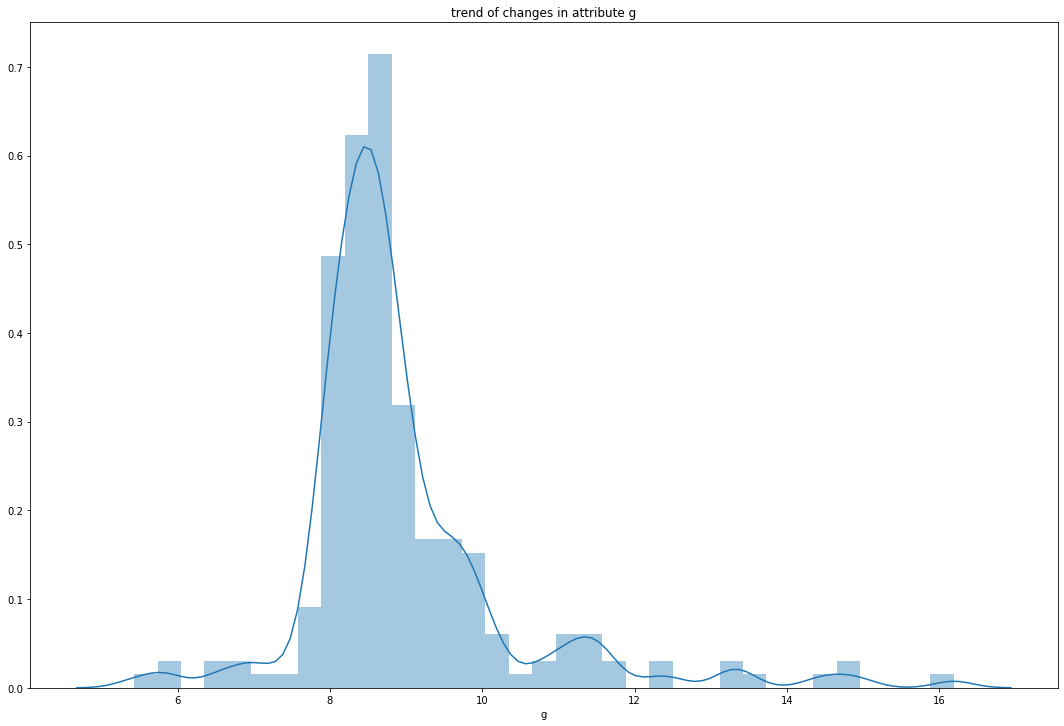

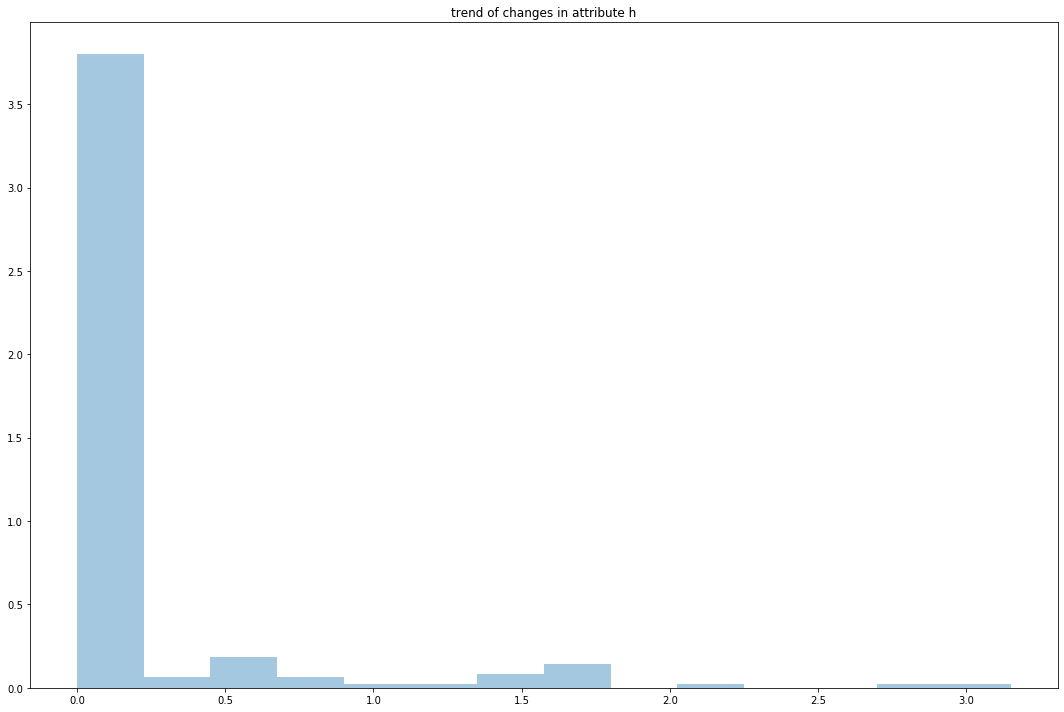

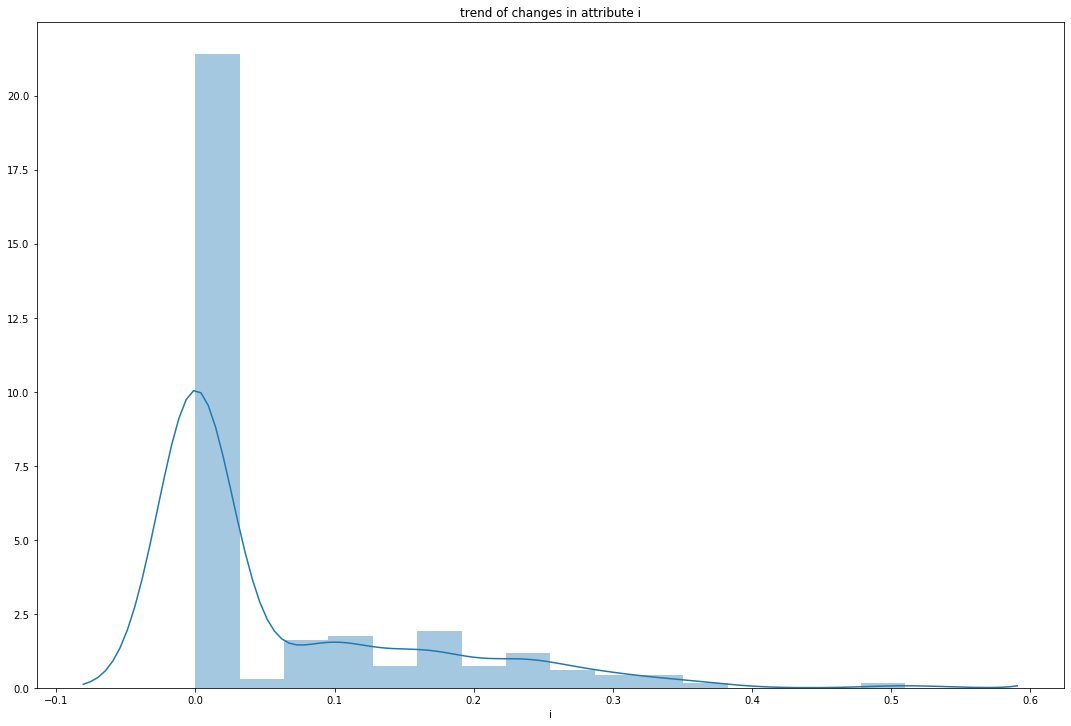

In [98]:
import seaborn as seabornInstance
for i in df_ingredient.columns:
    try : 
        plt.figure(figsize=(15,10))
        plt.title('trend of changes in attribute '+ str (i))
        plt.tight_layout()
        seabornInstance.distplot(df_ingredient[i])
    except :
        print("cannot find trend in "+ str(i))

# apply Zero Inflated Poisson Regression model

In [99]:
from patsy import dmatrices
import statsmodels.api as sm
mask = np.random.rand(len(df_ingredient)) < 0.8
df_train = df_ingredient[mask]
df_test = df_ingredient[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))
explist=['a ~ b+c+d+e+f+g+h+i','b ~ a+c+d+e+f+g+h+i','c ~ b+a+d+e+f+g+h+i','d ~ b+c+a+e+f+g+h+i',
         'e ~ b+c+d+a+f+g+h+i','f ~ b+c+d+e+a+g+h+i','g ~ b+c+d+e+f+a+h+i','h ~ b+c+d+e+f+g+a+i',
         'i ~ b+c+d+e+f+g+h+a']
for expr in explist:
    y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
    y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')
    zip_training_results = sm.ZeroInflatedPoisson(endog=y_train, exog=X_train, exog_infl=X_train, inflation='logit').fit()
    print(zip_training_results.summary())

Training data set length=175
Testing data set length=39
Optimization terminated successfully.
         Current function value: 1.181940
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                       a   No. Observations:                  175
Model:             ZeroInflatedPoisson   Df Residuals:                      166
Method:                            MLE   Df Model:                            8
Date:                 Tue, 17 Nov 2020   Pseudo R-squ.:               2.220e-06
Time:                         18:35:36   Log-Likelihood:                -206.84
converged:                        True   LL-Null:                       -206.84
Covariance Type:             nonrobust   LLR p-value:                     1.000
                        coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------

c:\users\farshid\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\farshid\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\farshid\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\farshid\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 1.346608
         Iterations: 35
         Function evaluations: 40
         Gradient evaluations: 40
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                       c   No. Observations:                  175
Model:             ZeroInflatedPoisson   Df Residuals:                      166
Method:                            MLE   Df Model:                            8
Date:                 Tue, 17 Nov 2020   Pseudo R-squ.:                  0.2349
Time:                         18:35:37   Log-Likelihood:                -235.66
converged:                       False   LL-Null:                       -308.03
Covariance Type:             nonrobust   LLR p-value:                 2.451e-27
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
inflate_Intercept     0.0945        nan        nan    

c:\users\farshid\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\farshid\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\farshid\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
c:\users\farshid\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
c:\users\farshid\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                       e   No. Observations:                  175
Model:             ZeroInflatedPoisson   Df Residuals:                      166
Method:                            MLE   Df Model:                            8
Date:                 Tue, 17 Nov 2020   Pseudo R-squ.:                0.001273
Time:                         18:35:37   Log-Likelihood:                -536.03
converged:                       False   LL-Null:                       -536.72
Covariance Type:             nonrobust   LLR p-value:                    0.9947
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
inflate_Intercept    -0.0071    1.1e+06  -6.44e-09      1.000   -2.16e+06    2.16e+06
inflate_b            -0.9697   1948.844     -0.000      1.000   -3820.633    3818.694
inflate_c       

         Current function value: 0.299034
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                       h   No. Observations:                  175
Model:             ZeroInflatedPoisson   Df Residuals:                      166
Method:                            MLE   Df Model:                            8
Date:                 Tue, 17 Nov 2020   Pseudo R-squ.:                  0.4551
Time:                         18:35:37   Log-Likelihood:                -52.331
converged:                       False   LL-Null:                       -96.043
Covariance Type:             nonrobust   LLR p-value:                 1.548e-15
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
inflate_Intercept     0.0957        nan        nan    

c:\users\farshid\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\farshid\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\farshid\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\farshid\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\farshid\appdata\local\programs\python\python37\lib

In [100]:
#skewness along the index axis 
df_ingredient.skew(axis = 0, skipna = True) 

a    1.625431
b    0.454181
c   -1.152559
d    0.907290
e   -0.730447
f    6.551648
g    2.047054
h    3.416425
i    1.754327
dtype: float64

# Result :



Attributes a, d, f and g are right-skewed


Attributes c, h, f and i are zero-inflated


Attribute c is bi-modal


Attribute e is left-skewed.

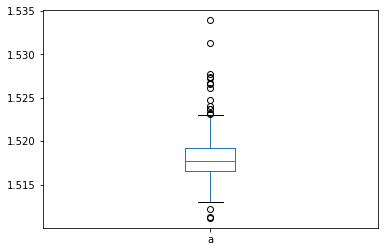

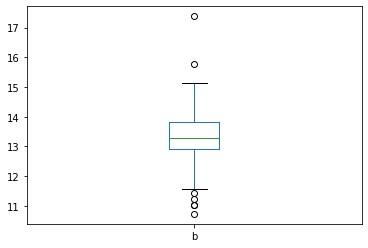

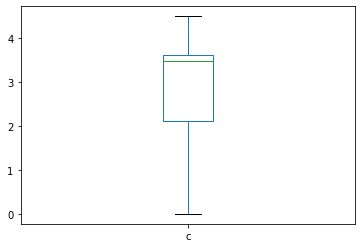

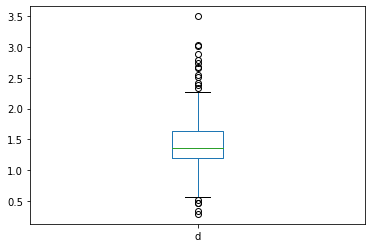

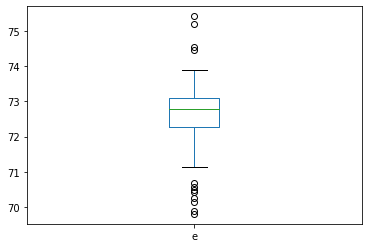

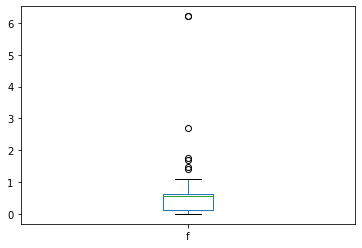

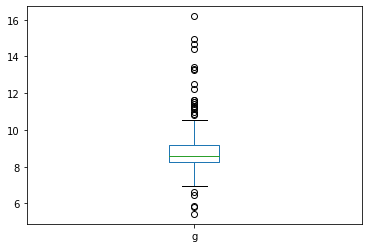

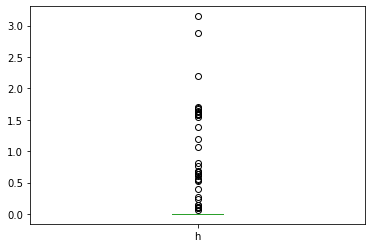

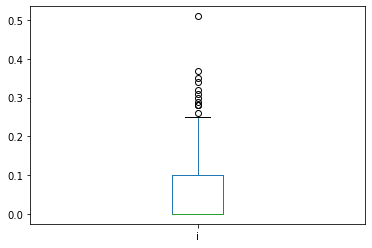

<Figure size 432x288 with 0 Axes>

In [73]:
for i in df_ingredient.columns:
    df_ingredient.boxplot(column=[i], grid=False )
    plt.figure()

# Part C 

# Normalize Data 

In [132]:
# Scaling the data so that all the features become comparable 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(df_ingredient) 
  
# Normalizing the data so that the data approximately  
# follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 

# Agglomerative Clustering 

In [133]:
from sklearn.decomposition import PCA 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 
import scipy.cluster.hierarchy as shc 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

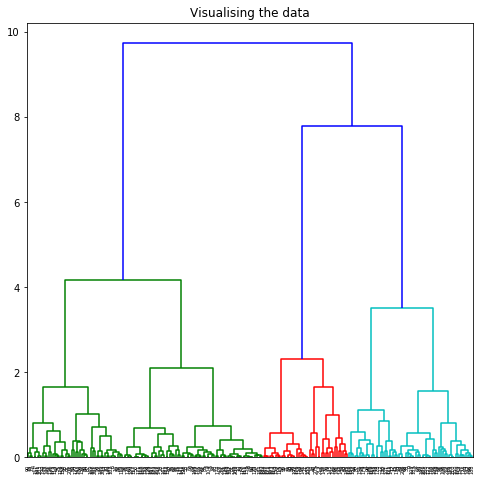

In [135]:
plt.figure(figsize =(8, 8)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward'))) 

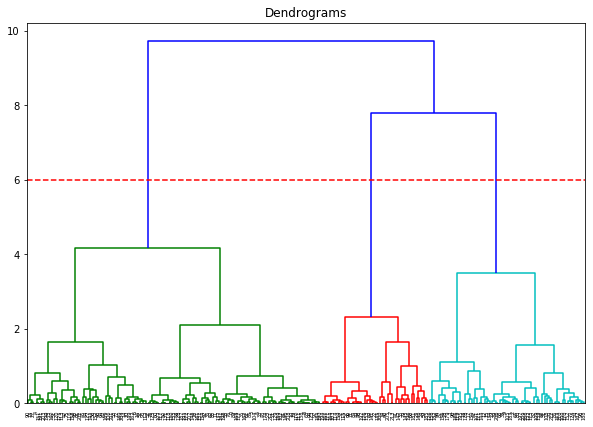

In [136]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_principal, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

2 cluster 

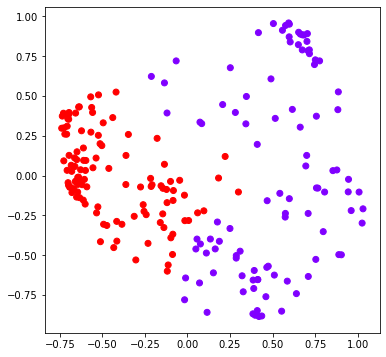

In [123]:
ac2 = AgglomerativeClustering(n_clusters = 2) 
  
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = ac2.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

3 cluster 

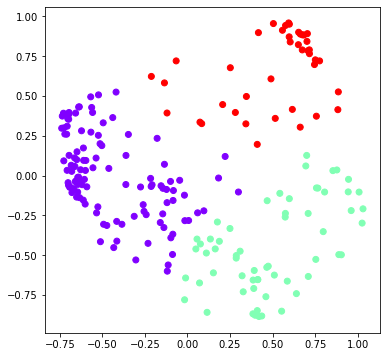

In [124]:
ac3 = AgglomerativeClustering(n_clusters = 3) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac3.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

4 cluster 

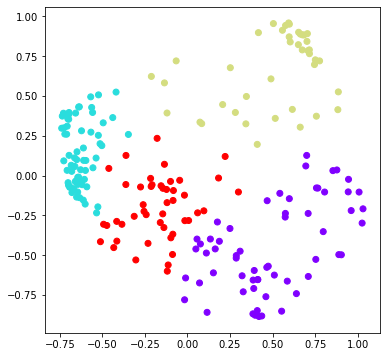

In [126]:

ac4 = AgglomerativeClustering(n_clusters = 4) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c = ac4.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

5 cluster 

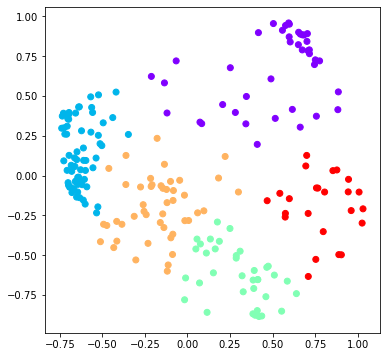

In [127]:
ac5 = AgglomerativeClustering(n_clusters = 5) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c = ac5.fit_predict(X_principal), cmap ='rainbow') 
plt.show()

6 cluster 

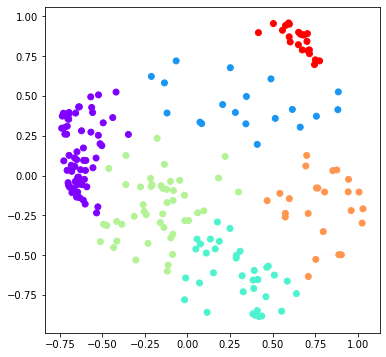

In [128]:
ac6 = AgglomerativeClustering(n_clusters = 6) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c = ac6.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

# silhouette scores and find best number cluster 

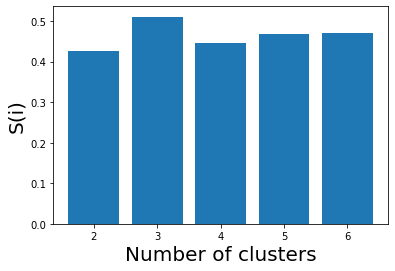

In [129]:
k = [2, 3, 4, 5, 6] 
  
# Appending the silhouette scores of the different models to the list 
silhouette_scores = [] 
silhouette_scores.append( 
        silhouette_score(X_principal, ac2.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac3.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac4.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac5.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac6.fit_predict(X_principal))) 
  
# Plotting a bar graph to compare the results 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

# Ellbow test by Kmeans 


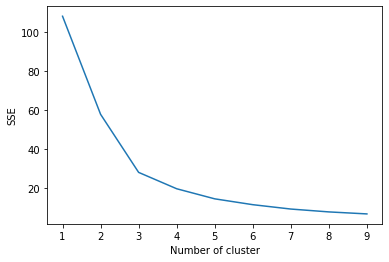

In [134]:
##model1- Kmeans 
from sklearn.cluster import KMeans
####ellbow to find best number cluster 

df_label=pd.DataFrame()
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_principal)
    ck="clusters"+str(k)
    df_label[ck] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

Ellbow Test by Kmeans Cluserting and also silhouette scores via Hierarchical Agglomerative Clustering is shown that 
we need 3 cluster 